## 데이터 로드
결정 트리: 하이퍼 파라미터 & 시각화

In [83]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris

iris_data = load_iris()


dt_clf = DecisionTreeClassifier(max_depth=5, random_state=156, max_features=1) # 깊이 제한
# dt_clf = DecisionTreeClassifier(min_samples_split=4, random_state=156, max_features=1) # 노드 안의 sample 값이 4이상일때만 분화 가능
# dt_clf = DecisionTreeClassifier(min_samples_leaf=4, random_state=156, max_features=1) # 노드 안의 value내부의 각각 값이 4이상일때 리프 노드
# min_samples_split=4
x_train, x_test, y_train, y_test =  train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 11)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=1, random_state=156)

In [84]:
x_train.shape

(120, 4)

## 결정 트리: 하이퍼 파라미터 & 시각화

In [85]:
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris

# export_graphviz()의 호출결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, feature_names = iris_data.feature_names, impurity=True, filled=True)


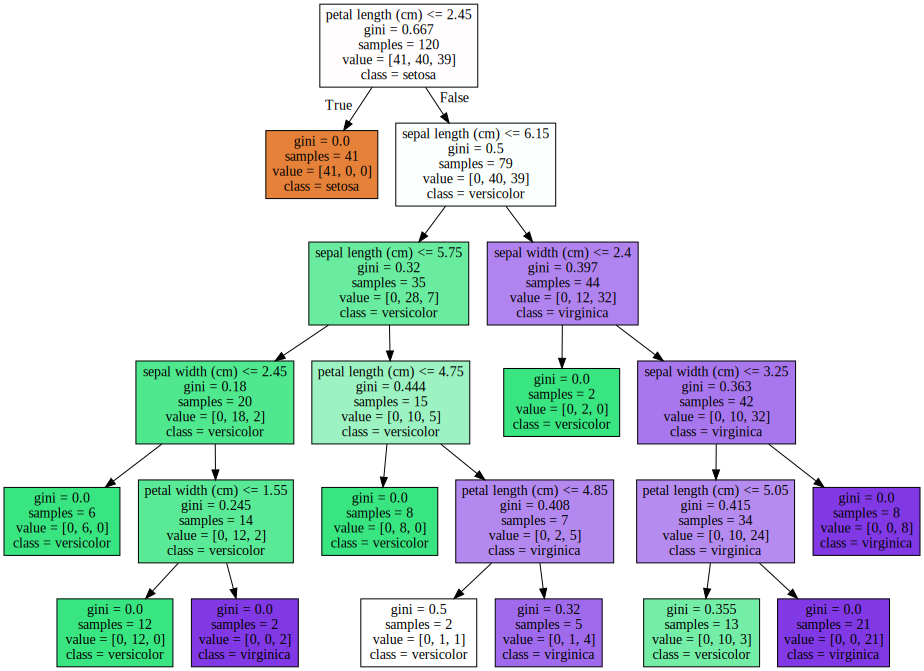

In [86]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.162 0.048 0.743 0.047]
sepal length (cm) : 0.162
sepal width (cm) : 0.048
petal length (cm) : 0.743
petal width (cm) : 0.047


<AxesSubplot:>

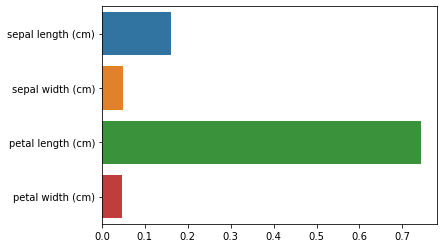

In [87]:
import seaborn as sns
import numpy as np
%matplotlib inline
#feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))
# feature별 importance매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print("{0} : {1:.3f}".format(name, value))
# feature importance를 column별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

## 결정트리:과적합

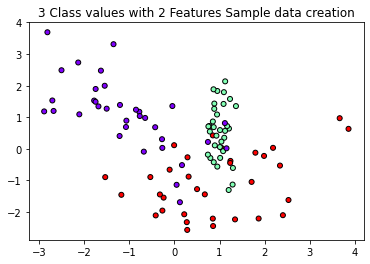

In [89]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")
# 2차원 시각화를 위해 feature는 2개(n_features=2), 결정값 클래스는 3가지(n_classes=3) 유형의 classification 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)
# n_clusters_per_class : 클래스당 클러스터 수
# n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
# n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolors='k')

In [96]:
import numpy as np

# Classifier의 Decision boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig, ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, camp='rainbow', edgcolor='k', clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어론 training 데이타로 model 학습
    model.fit(X, y)
    # meshgrid 형채인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_start, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary를 cisulization 수행
    n_classes = len(np.unique(y))
    contours = ax.contours(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes+1)-0.5, cmap='rainbow', clim=(y.min(), y.max()), zorder=1)
    

In [ ]:
form 